# Finance Data Analytics - Bank Loan
Weekly challenge: Week 4  
Date: 8/15/2022

## Import libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

## Reading the data file

In [22]:
#data_dir_path = os.path.dirname(__file__)
data_dir_path = os.path.dirname(os.path.abspath("__file__"))
data_url = os.path.join(data_dir_path, 'Bank_Personal_Loan_Modelling.xlsx')
df = pd.read_excel(data_url,1)

In [25]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data preparation

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Comments:

-- There is no null values in this dataset.  
-- There are 5000 rows and 14 columns.

In [311]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [29]:
# ID column is not useful so I will delete it.
df.drop('ID', axis=1, inplace=True)

In [33]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Five point summary to get description of the data

In [41]:
fig = px.box(df, y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

Comments:

-- The data is skewed to the right with some high income values outliers.

In [49]:
#Visualize distribution of data

# Checking skewness in each feature
df.skew()

Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598457
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

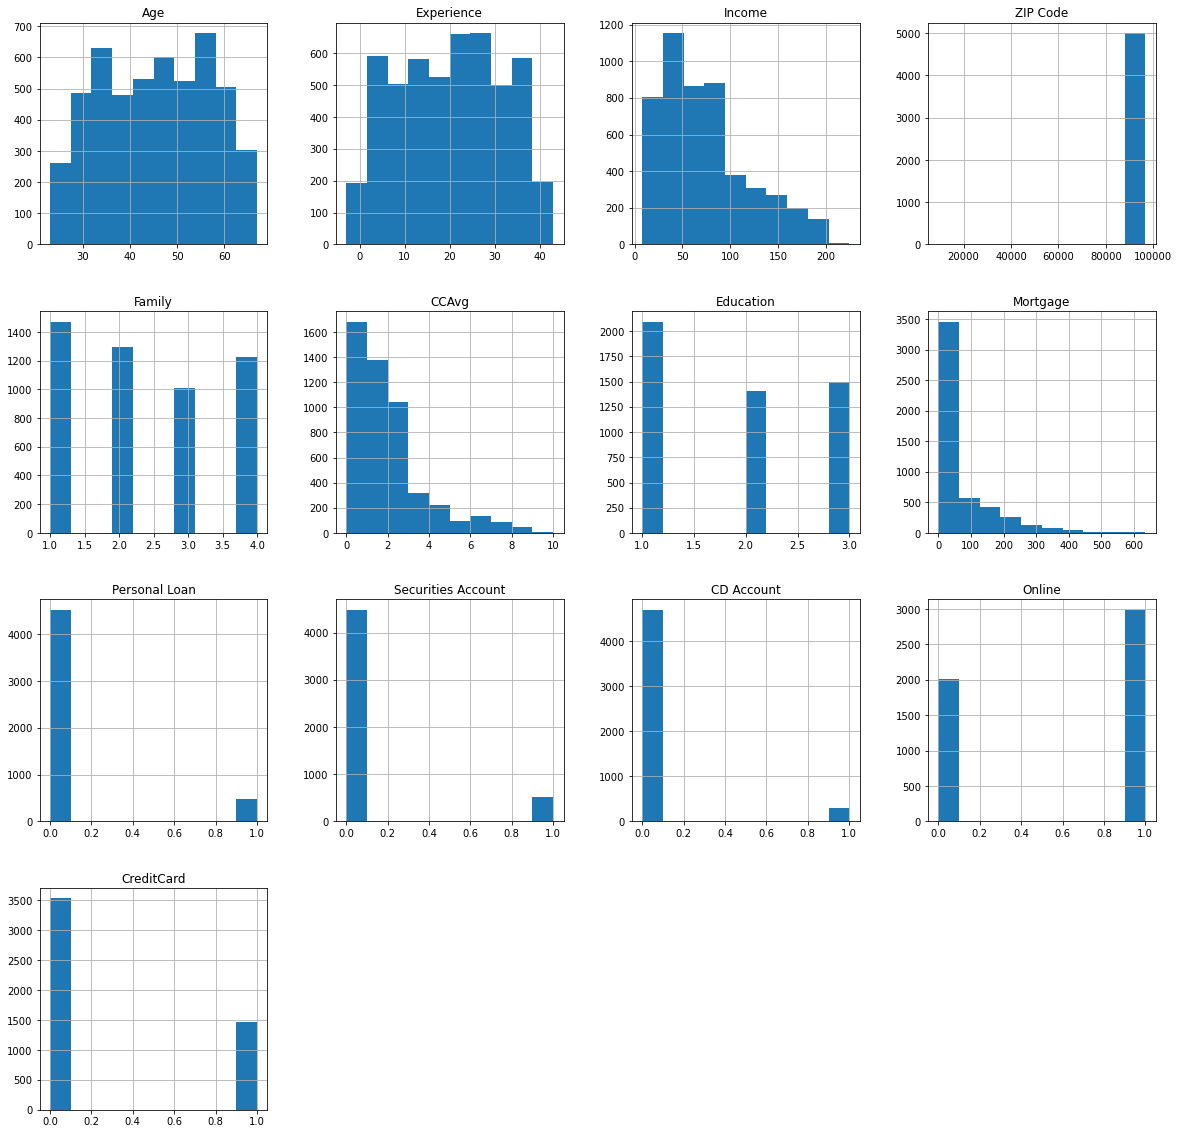

In [51]:
df.hist(figsize=(20,20))
plt.show()

Comments:

-- Age and Experience have close to uniform distribution.  
-- Income, CCAvg and Mortgage plots follow some sort of exponential distribution. When working with exponential distribution graph, it would be better to plot with a log scale.

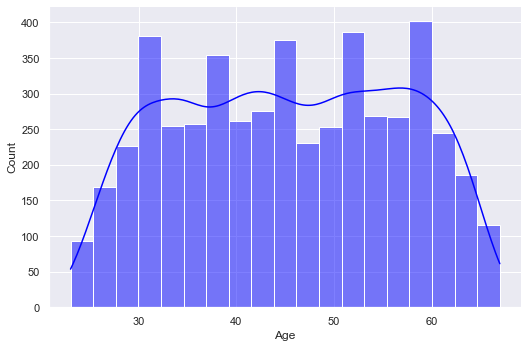

In [71]:
sns.displot(df['Age'], kde=True, color='blue', height=5, aspect=1.5)

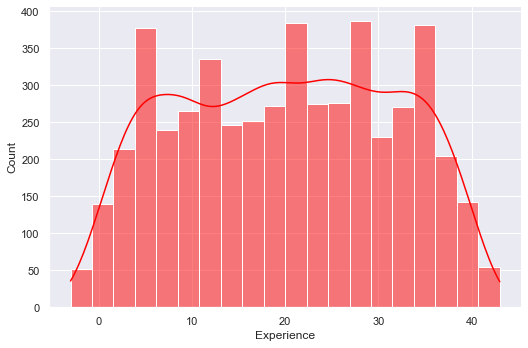

In [72]:
sns.displot(df['Experience'], kde=True, color='red', height=5, aspect=1.5)

Comments:

-- Experience has -ve experience values which is not possible.

In [113]:
# Separating -ve experience values in a new dataframe
negative_exp = df[df['Experience'] < 0]
negative_exp.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [125]:
#negative_exp..shape() 
negative_exp.shape

(52, 13)

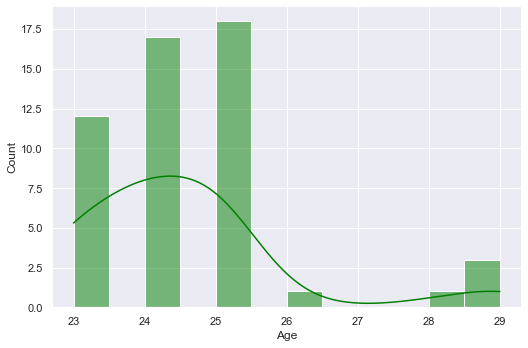

In [128]:
sns.displot(negative_exp['Age'], kde=True, height=5, aspect=1.5, color='green')

In [147]:
df['Experience'].mean()

20.1046

In [149]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [145]:
print('There are {} records that have -ve values for Experience. '
      'It is about {} % of data.'.format(len(negative_exp), (len(negative_exp) / len(df) * 100)))

There are 52 records that have -ve values for Experience. It is about 1.04 % of data.


In [150]:
data = df.copy()

Change the -ve values in 'Experience' to mean values of 'Experience'.

In [151]:
data['Experience'] = np.where(data['Experience'] < 0, data['Experience'].mean(), data['Experience'])

In [152]:
data['Experience'].mean()

20.32868784000002

### Checking corelation of data

In [73]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


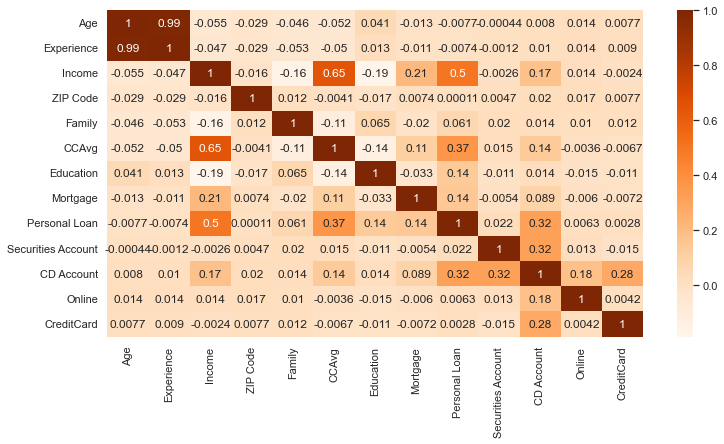

In [197]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(df.corr(), cmap="Oranges", annot = True)

Comments:

-- Age and Experience are highly corelated so we can drop any one of the two parameters. I am dropping Experience.

In [198]:
data = data.drop(['Experience'], axis = 1)

### Analysis of education status of customers

In [200]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [203]:
def mark(x):
    if x == 1:
        return 'Undergrad'
    elif x == 2:
        return 'Graduate'
    else:
        return 'Advanced/Professional'

In [204]:
data['Edu_mark'] = data['Education'].apply(mark)

In [205]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,Graduate


In [210]:
EDU_dis = data.groupby('Edu_mark')['Age'].count()

In [211]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergrad                2096
Name: Age, dtype: int64

In [228]:
fig = px.pie(data, values = EDU_dis, names = EDU_dis.index, title = 'Customers\' Education Status')

fig.show()

Comments:

-- Education with Undergrad degree apply more for loan than the other two categories. It is possible that thare are more people with Undergrad qualification than the other 2 categories.

### Explore the account holder distribution

I will explore "Securities Account"	and "CD Account" columns in this section.

In [217]:
data.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

In [218]:
def Security_CD(row):
    if ((row['Securities Account'] == 1) & (row['CD Account'] == 1)):
        return 'Holds Securities & Deposits'
    elif ((row['Securities Account'] == 0) & (row['CD Account'] == 0)):
        return 'Does not Hold Securities & Deposits'
    elif ((row['Securities Account'] == 1) & (row['CD Account'] == 0)):
        return 'Holds Securities only'
    elif ((row['Securities Account'] == 0) & (row['CD Account'] == 1)):
        return 'Holds Deposits only'

In [219]:
data['Account_holder_category'] = data.apply(Security_CD, axis = 1)

In [220]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,Undergrad,Holds Securities only
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,Undergrad,Holds Securities only
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not Hold Securities & Deposits
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Hold Securities & Deposits
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Hold Securities & Deposits


In [223]:
values_ = data['Account_holder_category'].value_counts()
values_

Does not Hold Securities & Deposits    4323
Holds Securities only                   375
Holds Deposits only                     155
Holds Securities & Deposits             147
Name: Account_holder_category, dtype: int64

In [222]:
values.index

Index(['Does not Hold Securities & Deposits', 'Holds Securities only',
       'Holds Deposits only', 'Holds Securities & Deposits'],
      dtype='object')

In [229]:
fig = px.pie(data, values = values_, names = values_.index, title = 'Customers\' Investment Details')

fig.show()

Comments:

-- More than 86% of customers do not have any security or deposit, so the bank has opportunity to make new customers and can increase their reserve fund.  
-- There are about 6% of customers who hold deposits; the bank can attract more customers by giving better deposit rates and offer more options for the deposits.  
-- There are about 10% of customers who hold securities; the bank can attract more customers by offering more options for the securities.

### Analysis of customers on the basis of their Education, Income and Personal loan status 

In [231]:
px.box(data, x='Education', y='Income', facet_col='Personal Loan')

Comments:

-- Customers who accepted personal loan have almost the same income range regardless of their education background.  
-- The median income for customers who accepted personal loan is higher than that of those who did not accept loan. One reason why they did not accept loan could be financial insecurity due to their lower income which could in turn make it difficult for them to pay the loan payment.

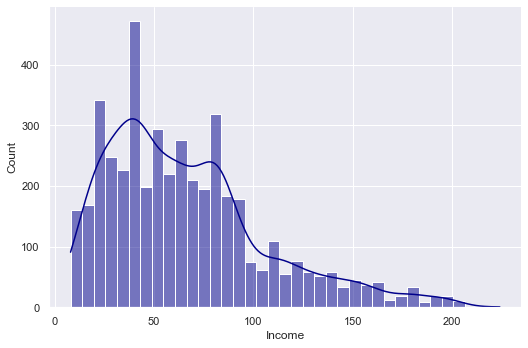

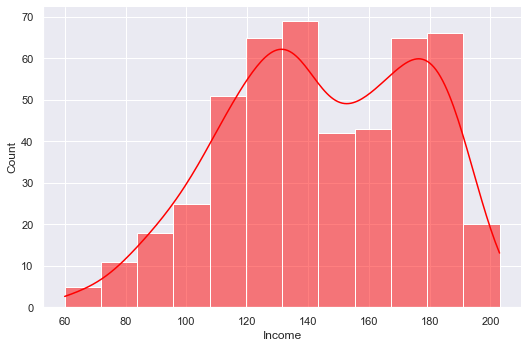

In [262]:
# Further analysis of distribution of customers who did not accept personal loan
sns.displot(data[data['Personal Loan'] == 0]['Income'], kde=True, height=5, aspect=1.5, color='darkblue')

# Further analysis of distribution of customers who accepted personal loan
sns.displot(data[data['Personal Loan'] == 1]['Income'], kde=True, height=5, aspect=1.5, color='red')

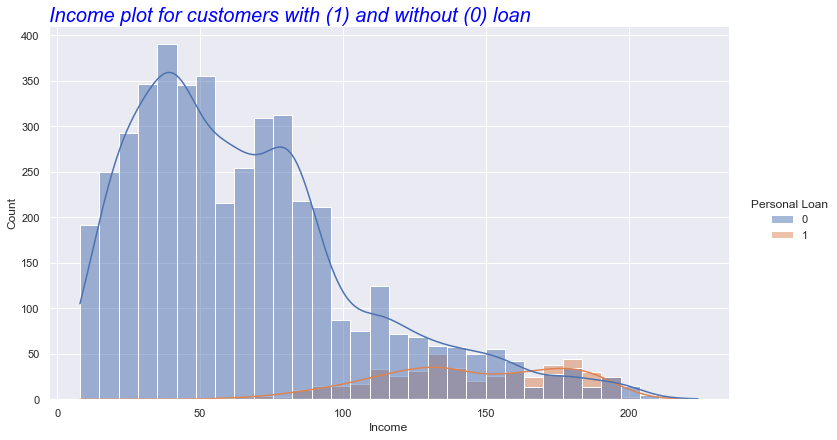

In [303]:
# Combining two income distribution plots, customers with and without personal loan
sns.displot(data = data, x = 'Income', hue = 'Personal Loan', kde=True, height=6, aspect=1.75)
plt.title(label='Income plot for customers with (1) and without (0) loan', fontsize=20, color="blue", pad='5.0', loc="left",
          fontstyle='italic')
plt.show()

### Automate the analysis

In [304]:
# Function to automate the plots
def plot(col1, col2, title):
    sns.displot(data = data, x = col1, hue = col2, height=6, aspect=1.75, kind="kde")
    plt.title(label=title, fontsize=20, color="blue", 
              pad='5.0', loc="left", fontstyle='italic')

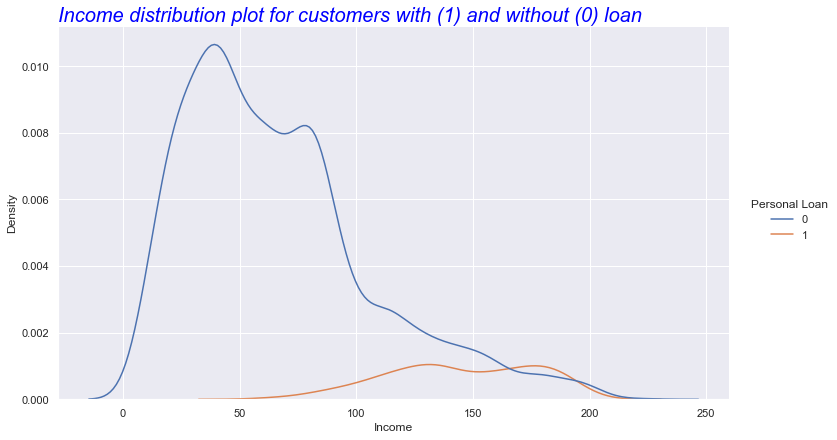

In [309]:
titl = 'Income distribution plot for customers with (1) and without (0) loan'
plot('Income', 'Personal Loan', titl)

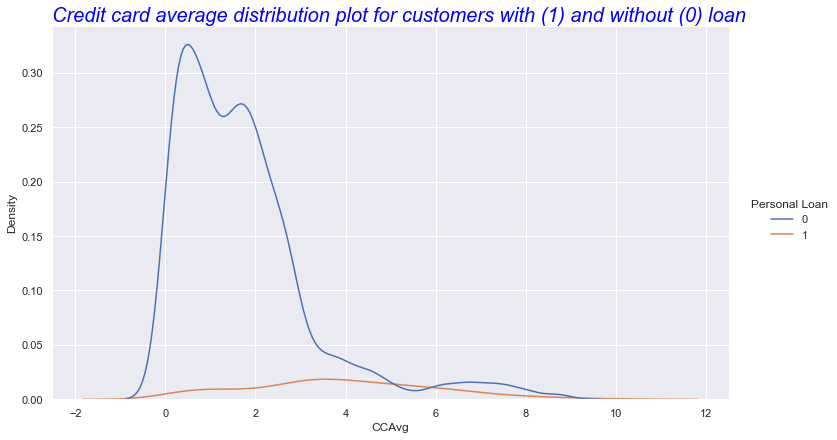

In [308]:
# Combining credit card average distribution plots for customers with and without personal loan
titl = 'Credit card average distribution plot for customers with (1) and without (0) loan'
plot('CCAvg', 'Personal Loan', titl)

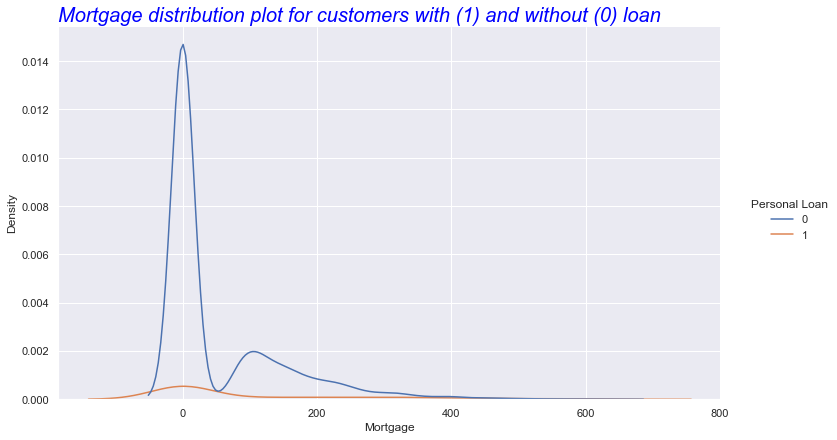

In [310]:
# Combining mortgage distribution plots for customers with and without personal loan
titl = 'Mortgage distribution plot for customers with (1) and without (0) loan'
plot('Mortgage', 'Personal Loan', titl)

### Analyze categories of customers on the basis of Security account, Online, Account_holder category & credit card...

In [312]:
data.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [325]:
col_names = ['Securities Account','Online','Account_holder_category','CreditCard']
#col_names = ['Securities Account','Online','Account_holder_category']
#col_names = ['Securities Account','Online']
#col_names = ['Securities Account']

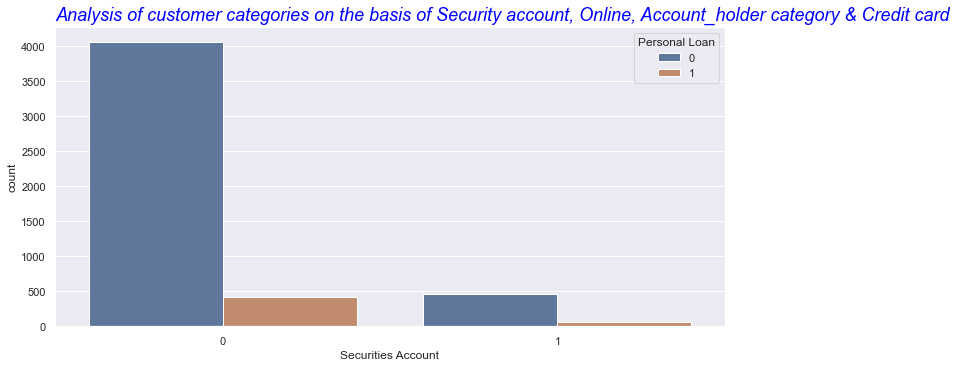

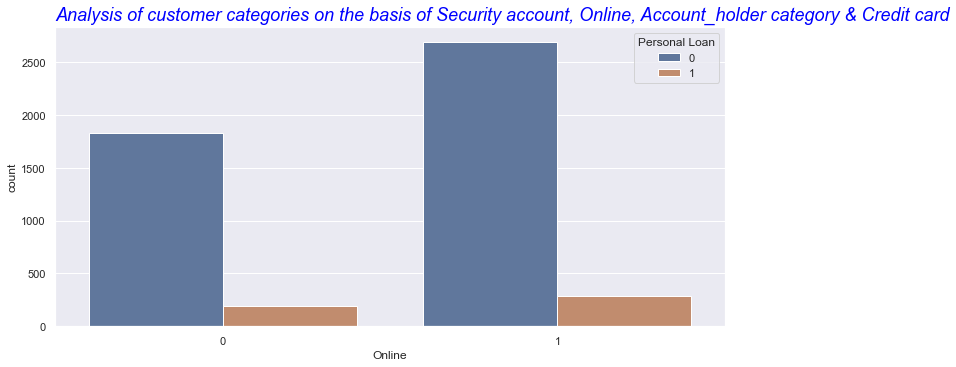

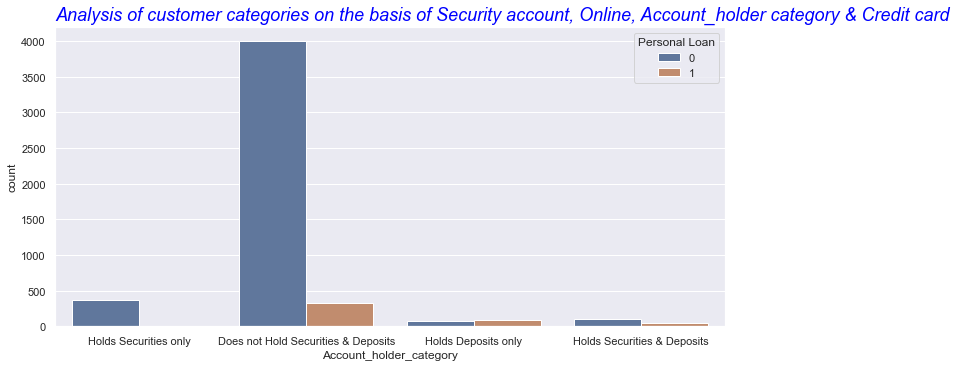

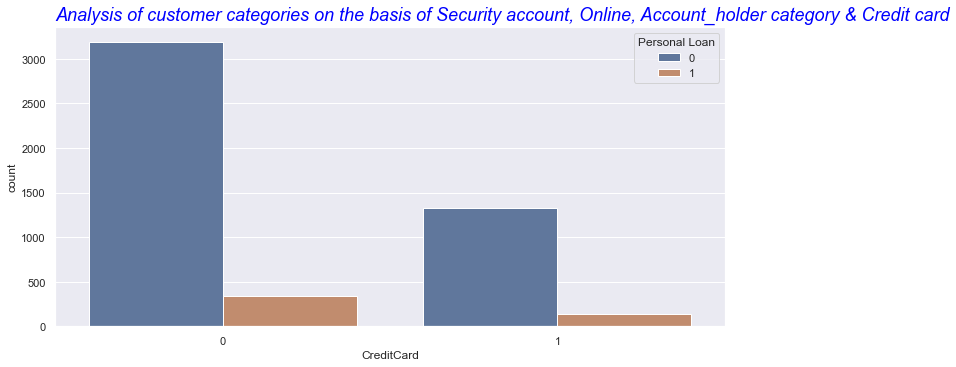

In [429]:
for i in col_names:
    plt.figure(figsize=(12,5.5))
    sns.countplot(x=i, hue='Personal Loan', data=data, saturation=.6, palette=sns.color_palette("deep", 3)) # husl,hls,deep,muted,bright,pastel,dark,colorblind
#    sns.countplot(x = i, hue = 'Personal Loan', data = data, palette="mako", saturation=.3)
#    sns.countplot(x=i, hue='Personal Loan', data=data, palette="mako", facecolor=(0, 0, 0, 0), linewidth=2, edgecolor=sns.color_palette("dark", 3))
    title='Analysis of customer categories on the basis of Security account, Online, Account_holder category & Credit card'
    plt.title(label=title, fontsize=18, color="blue", pad='7.0', loc="left", fontstyle='italic')

### How age of a person is going to be a factor in available loan?

<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

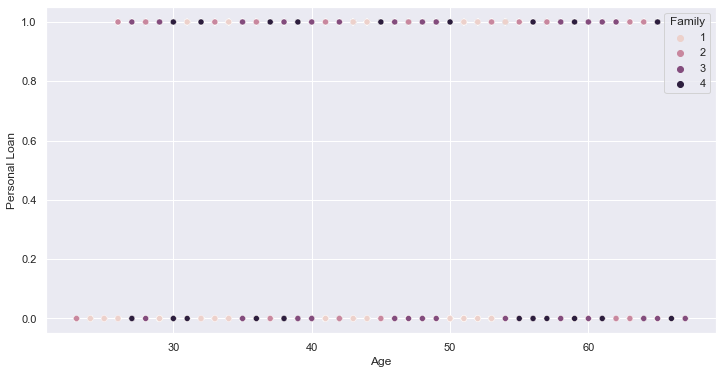

In [434]:
# Scatter plot between age and personal loan
plt.figure(figsize=(12,6))
sns.scatterplot(data['Age'], data['Personal Loan'], hue = data['Family'])

Perform hypothesis

In [436]:
import scipy.stats as stats

In [444]:
# Perform T test, define 2 hypothesis

# Null hupothesis
H0 = 'Age doesn\'t have an impact on the available personal loan'
# Alternate hypothesis
Ha = 'Age does have an impact on the available personal loan'

In [445]:
age_no = np.array(data[data['Personal Loan'] == 0]['Age'])
age_yes = np.array(data[data['Personal Loan'] == 1]['Age'])

In [447]:
# Perform 2 sample T test
t, p_value = stats.ttest_ind(age_no, age_yes, axis = 0)
if p_value < 0.05:
    print(Ha, 'as the p_value is less than 0.05 with a value of {}.'.format(p_value))
else:
    print(H0, 'as the p_value is greater than 0.05 with a value of {}.'.format(p_value))    

Age doesn't have an impact on the available personal loan as the p_value is greater than 0.05 with a value of 0.584959263705325.


### Automate above hupothesis

In [453]:
def Hypothesis(col1, col2, HO, Ha): # col1 --> Personal Loan, col2 --> Age
    arry1 = np.array(data[data[col1] == 0][col2]) # age_no
    arry2 = np.array(data[data[col1] == 1][col2]) # age_yes

    t, p_value = stats.ttest_ind(arry1, arry2, axis = 0)
    if p_value < 0.05:
        print('{}, as the p_value is less than 0.05 with a value of {}.'.format(Ha, p_value))
    else:
        print('{}, as the p_value is greater than 0.05 with a value of {}.'.format(HO, p_value))    

In [454]:
Hypothesis('Personal Loan', 'Age', HO='Age doesn\'t have an impact on the available personal loan',
           Ha='Age does have an impact on the available personal loan')

Age doesn't have an impact on the available personal loan, as the p_value is greater than 0.05 with a value of 0.584959263705325.


### Does income of a person have an impact on availing loan?

In [455]:
Hypothesis(col1='Personal Loan', col2='Income', HO='Income doesn\'t have an impact on the available personal loan',
           Ha='Income does have an impact on the available personal loan')

Income does have an impact on the available personal loan, as the p_value is less than 0.05 with a value of 0.0.


<AxesSubplot:xlabel='Income', ylabel='Personal Loan'>

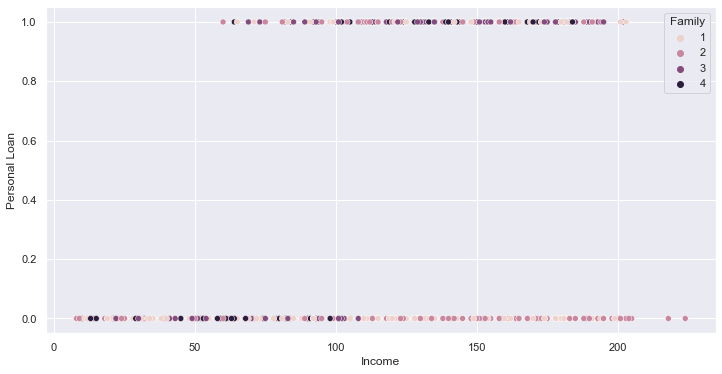

In [456]:
# Scatter plot between income and personal loan
plt.figure(figsize=(12,6))
sns.scatterplot(data['Income'], data['Personal Loan'], hue = data['Family'])

### Does the family size makes them to avail loan?

In [470]:
def Hypothesis(col1, col2, HO, Ha, scatter1, scatter2, hue_): # col1 --> Personal Loan, col2 --> Age
    arry1 = np.array(data[data[col1] == 0][col2]) # age_no
    arry2 = np.array(data[data[col1] == 1][col2]) # age_yes

    t, p_value = stats.ttest_ind(arry1, arry2, axis = 0)
    if p_value < 0.05:
        print('{}, as the p_value is less than 0.05 with a value of {}.'.format(Ha, p_value))
    else:
        print('{}, as the p_value is greater than 0.05 with a value of {}.'.format(HO, p_value))
    
    # Scatter plot
    plt.figure(figsize=(12,6))
    sns.scatterplot(scatter1, scatter2, hue = hue_)

Family does have an impact on the available personal loan, as the p_value is less than 0.05 with a value of 1.4099040685673807e-05.


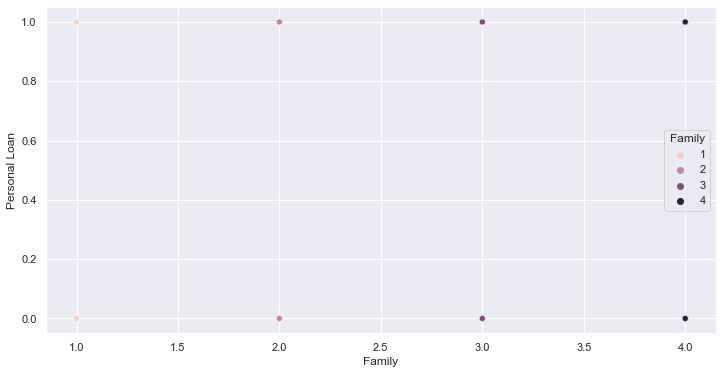

In [471]:
Hypothesis(col1='Personal Loan', col2='Family', HO='Family doesn\'t have an impact on the available personal loan',
           Ha='Family does have an impact on the available personal loan', scatter1=data['Family'], 
           scatter2=data['Personal Loan'], hue_=data['Family'])

### --- END ---